In [4]:
setwd('/import/jliu//data2/scrna/')

In [5]:
getwd()

[1] "/import/liujing/data2/scrna"

In [6]:
library(Seurat)

In [7]:
library(cellcall)
scRNA = readRDS('scRNA.rds')



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree



In [10]:
Idents(scRNA) = 'celltype'

In [9]:
table(scRNA$celltype)


     B_cell    Monocyte     NK_cell Neutrophils     T_cells 
         25         258         691       52055        2210 

In [11]:
scRNA1 = subset(scRNA,idents = c('Neutrophils','B_cell'))

In [12]:
t = readRDS('./after_t.rds')

In [13]:
mono = readRDS('./after_mono.rds')

In [15]:
sce = merge(t,merge(mono,scRNA1))

In [18]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [19]:
meta  = sce@meta.data %>%  dplyr::select(celltype,Phase)

In [21]:
scRNA = AddMetaData(scRNA,metadata = meta)

In [22]:
library(Seurat)

In [23]:
options(repr.plot.width = 8,repr.plot.height = 5)

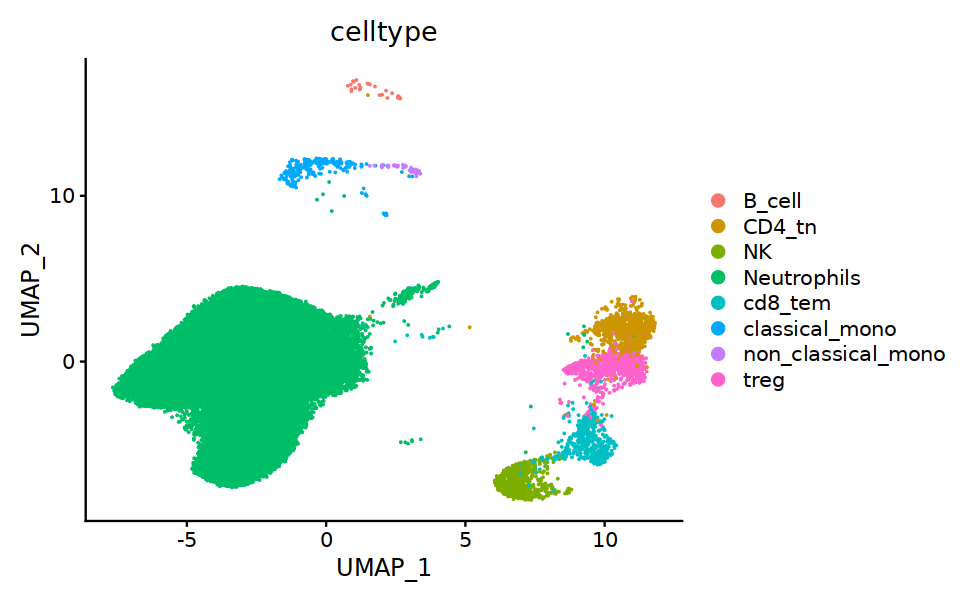

In [27]:
DimPlot(scRNA, group.by="celltype", label=F, label.size=5, reduction='umap')

In [28]:
options(repr.plot.width = 12,repr.plot.height = 12)

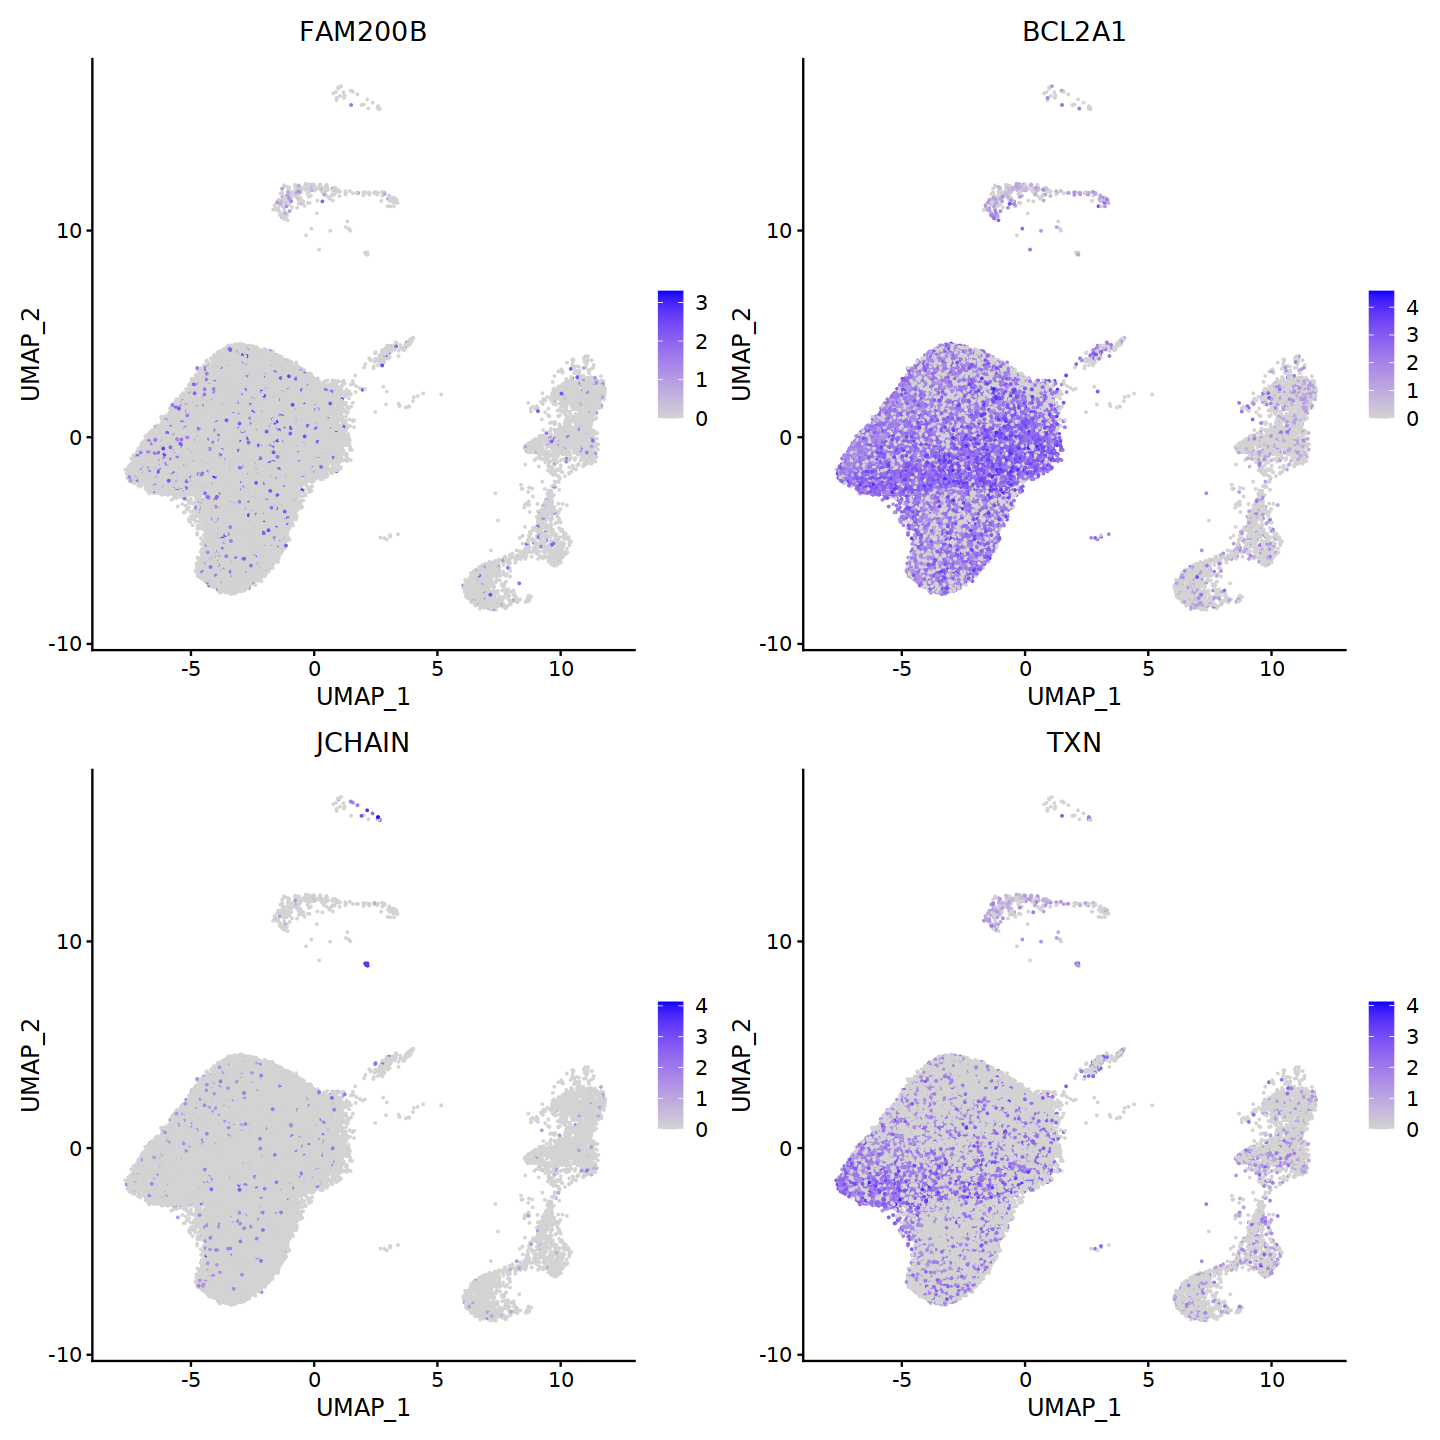

In [29]:
FeaturePlot(scRNA,features = c('FAM200B','BCL2A1','JCHAIN','TXN'))

In [30]:
Idents(scRNA) = 'group'

In [31]:
table(Idents(scRNA),scRNA$celltype)

     
      B_cell CD4_tn    NK Neutrophils cd8_tem classical_mono non_classical_mono
  Con     11    445   305       19758     295             70                 10
  CI      14    458   341       32297     277            146                 32
     
       treg
  Con   328
  CI    452

In [32]:
Idents(scRNA) = 'group'

In [33]:
options(repr.plot.width = 9,repr.plot.height = 8)

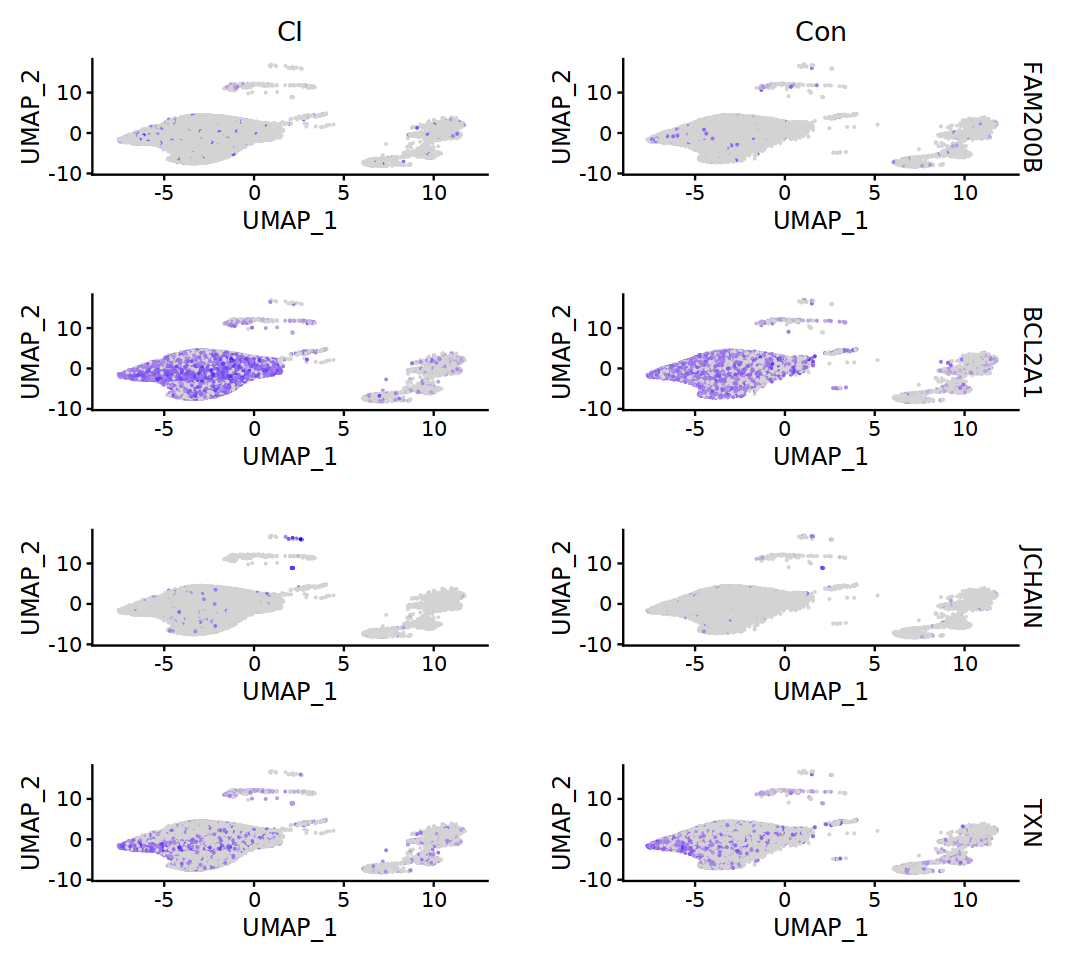

In [37]:
FeaturePlot(scRNA,features = c('FAM200B','BCL2A1','JCHAIN','TXN'),split.by = 'group' )

In [38]:
Idents(scRNA) = 'group'

In [39]:
library(AUCell)
library(clusterProfiler)
library(ggplot2)
library(Seurat)
#library(SeuratData)

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 501  510  545  585  834 4496 


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames =

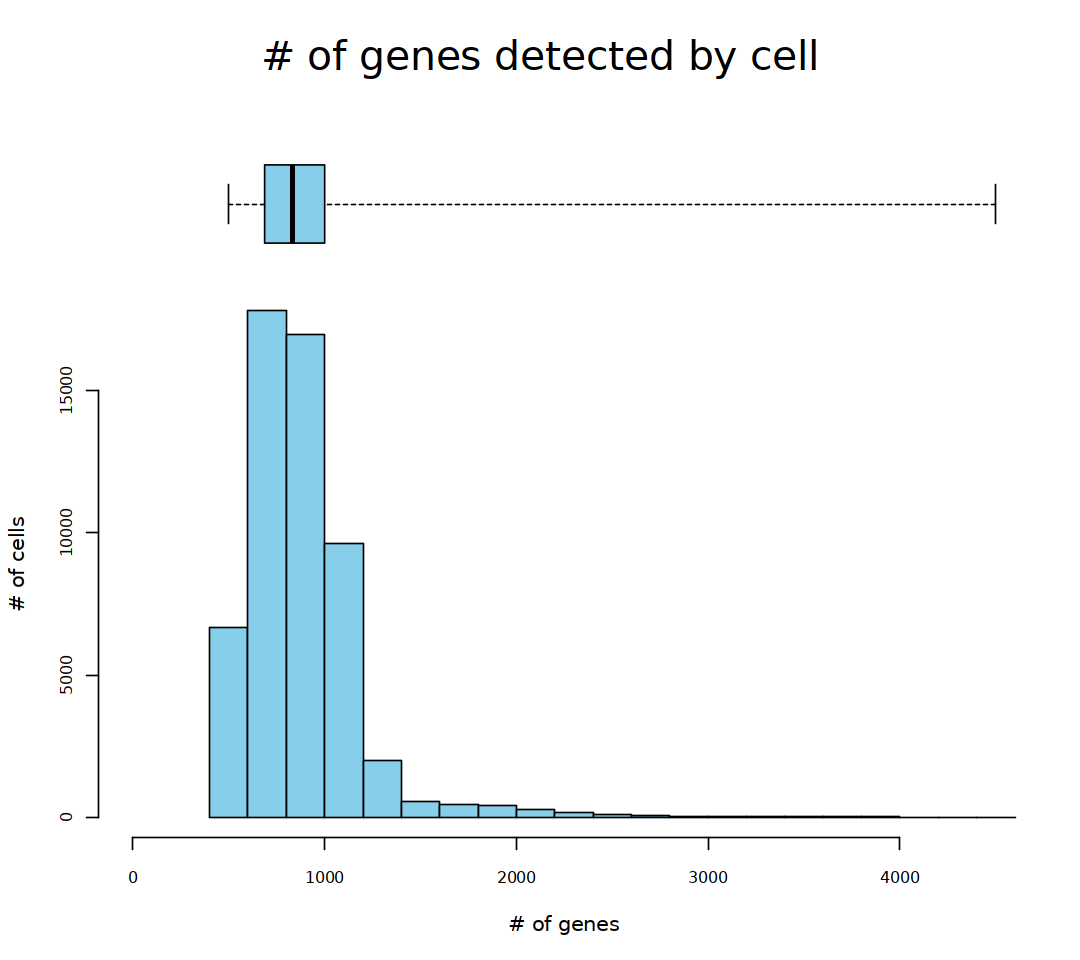

In [40]:
cells_rankings <- AUCell_buildRankings(scRNA@assays$RNA@data) 

In [41]:
geneSets  = list(model.gene = c('FAM200B','BCL2A1','JCHAIN','TXN'))

In [42]:
geneSets

$model.gene
[1] "FAM200B" "BCL2A1"  "JCHAIN"  "TXN"

In [43]:
cells_AUC <- AUCell_calcAUC(geneSets, cells_rankings,
                            aucMaxRank=nrow(cells_rankings)*0.1)

In [44]:
geneSet <- "model.gene"
aucs <- as.numeric(getAUC(cells_AUC)[geneSet, ])
scRNA$AUC <- aucs
df<- data.frame(scRNA@meta.data, scRNA@reductions$umap@cell.embeddings)
head(df,2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.8,seurat_clusters,pANN_0.25_0.005_5945,DF.classifications_0.25_0.005_5945,celltype,group,AUC,Phase,UMAP_1,UMAP_2
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
AAATCCTGTAAATAAATAGATAGAGGA_1,CTR-1.matrix,1167,599,1.456727,10,10,0.008361204,Singlet,Neutrophils,Con,0.1128386,NA,-4.027562,-1.3578306
AAATCCTGTAACCAAAGTCTACATGCG_1,CTR-1.matrix,1176,598,2.891156,0,0,0.025083612,Singlet,Neutrophils,Con,0.0000000,NA,-1.977203,-0.5150343


In [45]:
options(repr.plot.width = 5,repr.plot.height = 5)

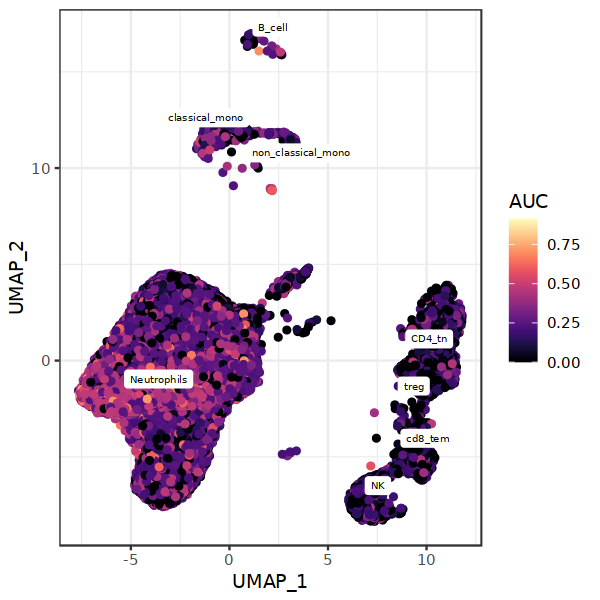

In [46]:
class_avg <- df %>%
  group_by( celltype) %>%
  summarise(
    UMAP_1 = median(UMAP_1),
    UMAP_2 = median(UMAP_2)
  )


ggplot(df, aes(UMAP_1, UMAP_2))  +
  geom_point(aes(colour  = AUC)) + viridis::scale_color_viridis(option="A") +
  ggrepel::geom_label_repel(aes(label = celltype),
                            data = class_avg,
                            size = 2,
                            label.size = 0,
                            segment.color = NA
  )+   theme(legend.position = "none") + theme_bw()

In [47]:
scd = scRNA

In [48]:
Idents(scd) = 'celltype'

In [49]:
scd@meta.data = df

In [50]:
options(repr.plot.width = 8,repr.plot.height = 5)

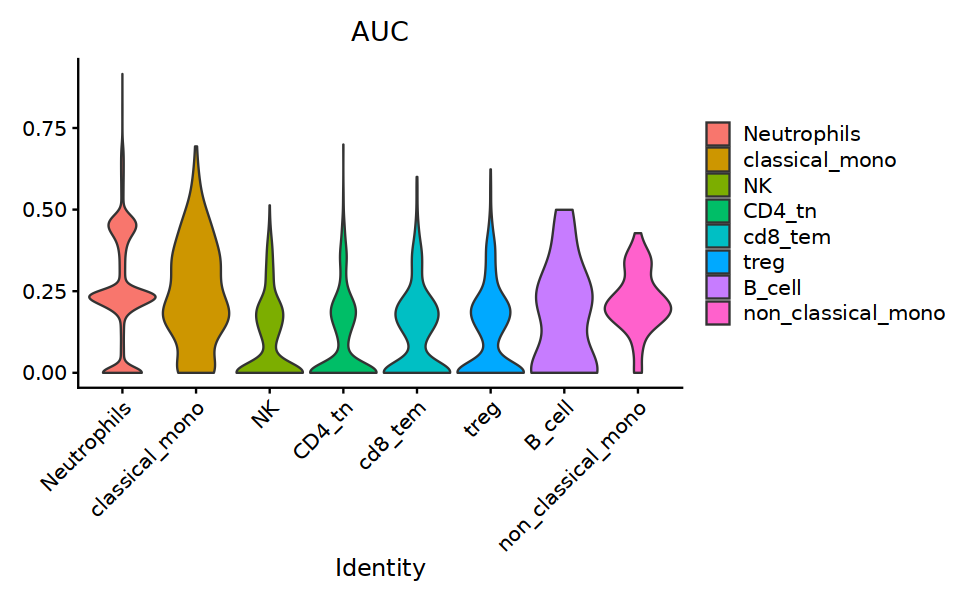

In [51]:
VlnPlot(scd,features = 'AUC',pt.size = 0)

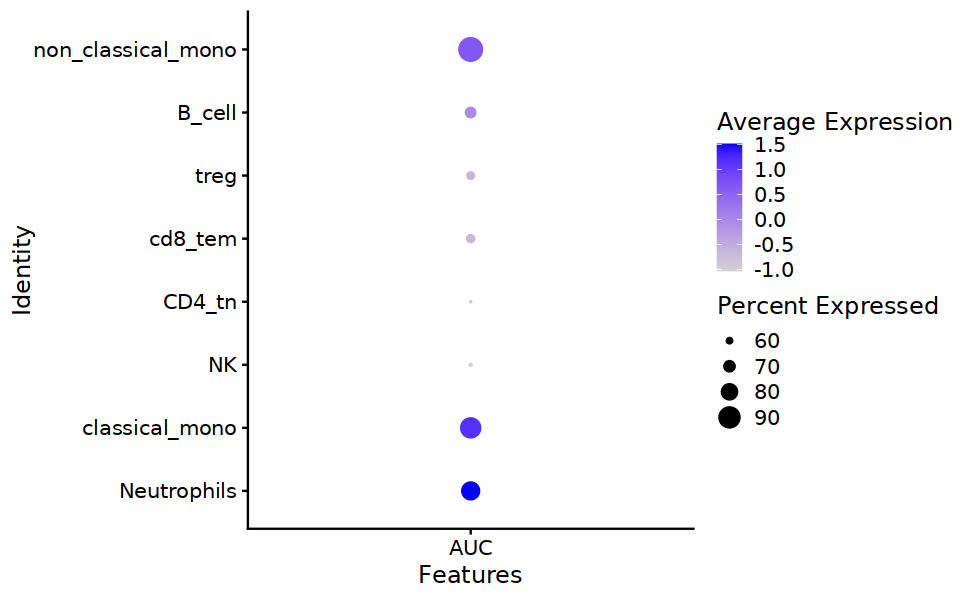

In [52]:
DotPlot(scd,features = 'AUC')

In [53]:
Idents(scd) = 'celltype'

In [256]:
# scd$celltype = gsub('[:+:]','-',scd$celltype)

In [257]:
# scd$celltype = gsub('Monocyte-CD16-','Monocyte',scd$celltype)

In [54]:
table(scd$celltype)


            B_cell             CD4_tn                 NK        Neutrophils 
                25                903                646              52055 
           cd8_tem     classical_mono non_classical_mono               treg 
               572                216                 42                780 

In [55]:
Idents(scd) = 'celltype'

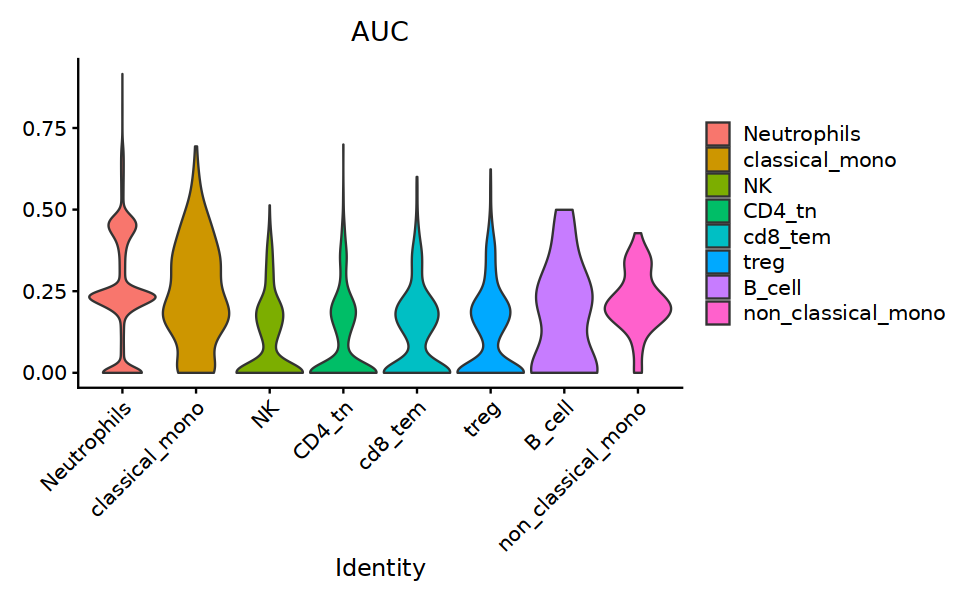

In [56]:
VlnPlot(scd,features = 'AUC',pt.size = 0)

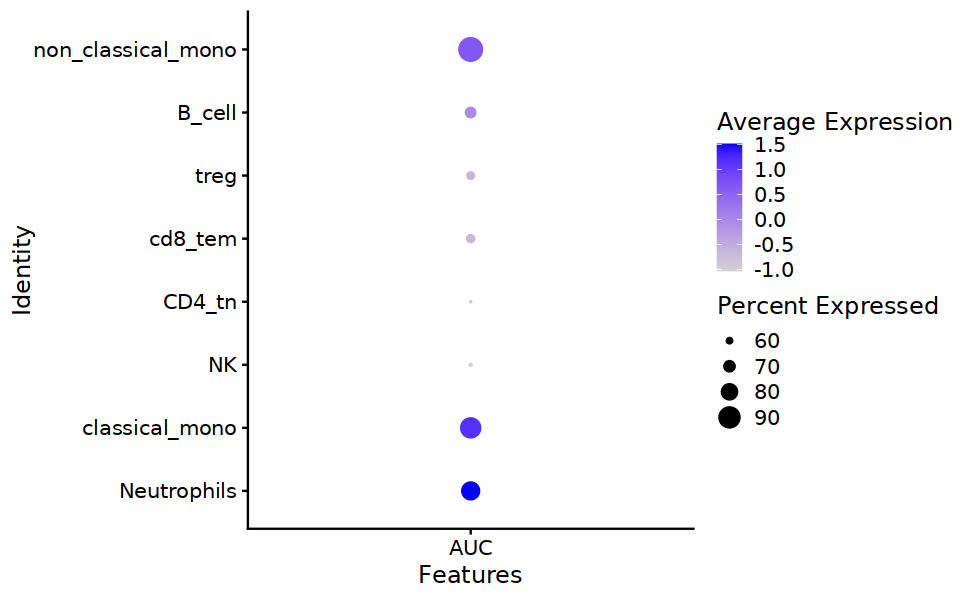

In [57]:
DotPlot(scd,features = 'AUC')

In [58]:
table(scRNA$celltype)


            B_cell             CD4_tn                 NK        Neutrophils 
                25                903                646              52055 
           cd8_tem     classical_mono non_classical_mono               treg 
               572                216                 42                780 

In [59]:
saveRDS(scRNA,file = 'scRNA.xifen.rds')

In [60]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$group)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('CI', 'Con'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)


   CI   Con 
34017 21222 


       Neutrophils     classical_mono                 NK             CD4_tn 
      0.9423595648       0.0039102808       0.0116946360       0.0163471460 
           cd8_tem               treg             B_cell non_classical_mono 
      0.0103550028       0.0141204584       0.0004525788       0.0007603324 

                    
                        CI   Con
  Neutrophils        32297 19758
  classical_mono       146    70
  NK                   341   305
  CD4_tn               458   445
  cd8_tem              277   295
  treg                 452   328
  B_cell                14    11
  non_classical_mono    32    10

Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


## 往下都是没有运行的

In [61]:
options(repr.plot.height = 6,rpr.plot.wdith = 5)

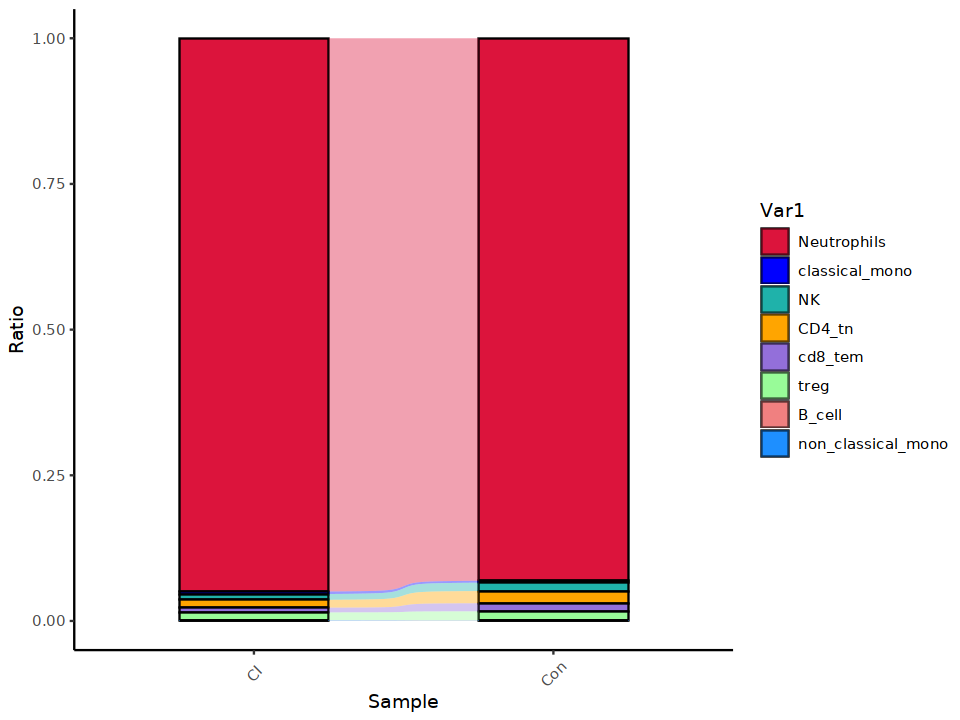

In [62]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [63]:
ggsave('figure6.pdf',height =  5,width = 4)

In [64]:
getwd()

[1] "/import/liujing/data2/scrna"

In [65]:
# for (i in unique(scRNA$celltype)){
#     DefaultAssay(scRNA) = 'RNA'
#     Idents(scRNA) = 'celltype'
#     sce = subset(scRNA,idents = i)
#     DotPlot(sce,group.by = 'group',features = 'DNM1L')
#     ggsave(paste0(i,'.group.pdf'))
    
# }

In [66]:
table(scRNA$celltype) 


            B_cell             CD4_tn                 NK        Neutrophils 
                25                903                646              52055 
           cd8_tem     classical_mono non_classical_mono               treg 
               572                216                 42                780 

In [67]:
Idents(scRNA) = 'celltype'

sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)



### https://zhuanlan.zhihu.com/p/573321126
## https://zhuanlan.zhihu.com/p/594345612


Calculating cluster Neutrophils

Calculating cluster classical_mono

Calculating cluster NK

Calculating cluster CD4_tn

Calculating cluster cd8_tem

Calculating cluster treg

Calculating cluster B_cell

Calculating cluster non_classical_mono



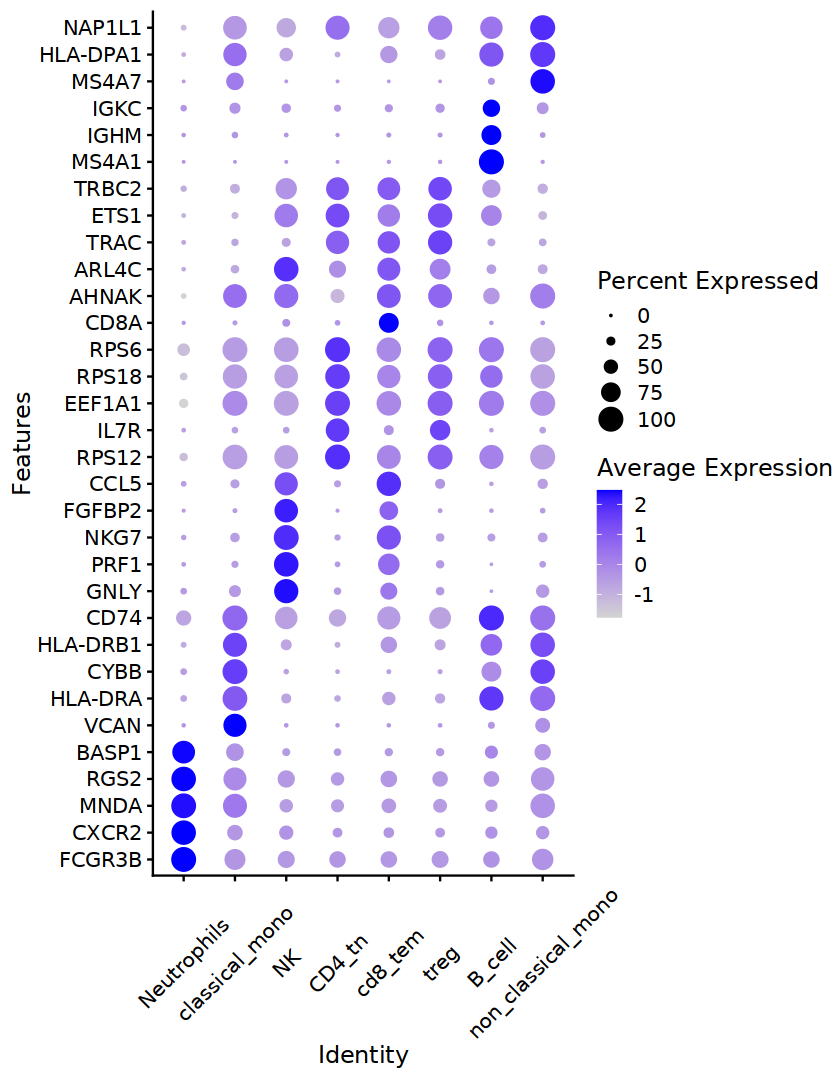

In [68]:
options(repr.plot.height = 9,repr.plot.width = 7)

 DotPlot(scRNA, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [69]:
ggsave('figure7.pdf',height =  9,width = 8)

### 热图

In [5]:
scRNA = readRDS('./scRNA.xifen.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [7]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject



In [8]:
Idents(scRNA) = 'celltype'
DefaultAssay(scRNA) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster Neutrophils

Calculating cluster classical_mono

Calculating cluster NK

Calculating cluster CD4_tn

Calculating cluster cd8_tem

Calculating cluster treg

Calculating cluster B_cell

Calculating cluster non_classical_mono



In [38]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

In [39]:
unique(scRNA$celltype)

[1] "Neutrophils"        "classical_mono"     "NK"                
[4] "CD4_tn"             "cd8_tem"            "treg"              
[7] "B_cell"             "non_classical_mono"

In [40]:
gene_cell_exp <- AverageExpression(scRNA,
                                   features = unique(top5$gene),
                                   group.by = 'celltype',
                                   slot = 'data') 
gene_cell_exp <- as.data.frame(gene_cell_exp$RNA)

In [41]:
gene_cell_exp = gene_cell_exp[,c('Neutrophils',"classical_mono",'NK','CD4_tn',
                                 'cd8_tem','treg','B_cell','non_classical_mono')]

In [42]:
library(ComplexHeatmap)
#顶部细胞类型注释
df <- data.frame(colnames(gene_cell_exp))
colnames(df) <- 'class'

In [43]:
df$class = factor(df$class,levels = c('Neutrophils',"classical_mono",'NK','CD4_tn',
                                 'cd8_tem','treg','B_cell','non_classical_mono'))

In [44]:
top_anno = HeatmapAnnotation(df = df,#细胞名/cluster
                             border = T,
                             show_annotation_name = F,
                             gp = gpar(col = 'black'),
                             col = list(class = c('Neutrophils' = '#A0CCFF','classical_mono'="#2F528F",
                                                  "NK"="#E3AD68",'CD4_tn'='#E64B35B2','cd8_tem'='#4DBBD5B2',
                                                 'treg'='#00A087B2','B_cell'='#F39B7FB2','non_classical_mono'='#4387B5')))#颜色设置

In [45]:
#数据标准化缩放一下
marker_exp <- t(scale(t(gene_cell_exp),scale = T,center = T))

In [48]:
options(repr.plot.width = 7,repr.plot.height = 8)

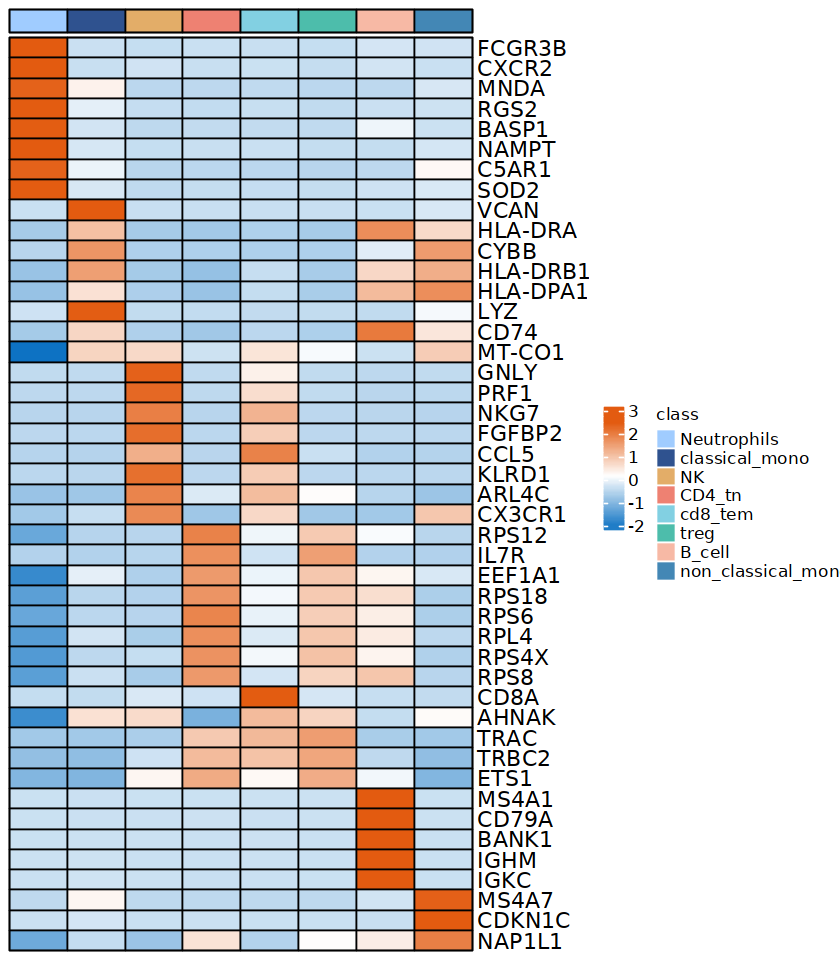

In [49]:
Heatmap(marker_exp,
        cluster_rows = F,
        cluster_columns = F,
        show_column_names = F,
        show_row_names = T,
        column_title = NULL,
        heatmap_legend_param = list(
          title=' '),
        col = colorRampPalette(c("#0D72C3","white","#E35B10"))(100),
        border = 'black',
        rect_gp = gpar(col = "black", lwd = 1),
        row_names_gp = gpar(fontsize = 13),
        column_names_gp = gpar(fontsize = 13),
        top_annotation = top_anno)

In [52]:
scRNA@meta.data %>% select(celltype,AUC) %>%
aggregate(., by=list(spot_label = .$celltype), FUN=mean)

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"


spot_label,celltype,AUC
<chr>,<dbl>,<dbl>
B_cell,NA,0.1648152
CD4_tn,NA,0.1054396
NK,NA,0.1036287
Neutrophils,NA,0.2600764
cd8_tem,NA,0.1273871
classical_mono,NA,0.2410917
non_classical_mono,NA,0.2190219
treg,NA,0.1301991


In [70]:
library('clusterProfiler')

In [71]:
library(dplyr) 
top50 <- sce.markers %>% group_by(cluster) %>% top_n(50, avg_log2FC)

group <- data.frame(gene=top50$gene,
                    group=top50$cluster)

Gene_ID <- bitr(top50$gene, fromType="SYMBOL", 
            toType="ENTREZID", 
            OrgDb="org.Hs.eg.db")
data  <- merge(Gene_ID,group,by.x='SYMBOL',by.y='gene')
data_GO <- compareCluster(
  ENTREZID~group, 
  data=data, 
  fun="enrichGO", 
  OrgDb="org.Hs.eg.db",
  ont = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff = 0.05,
  qvalueCutoff = 0.05,
  readable = TRUE
)





'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(top50$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"1.3% of input gene IDs are fail to map..."


In [72]:
data_GO_sim <- simplify(data_GO, 
                        cutoff=0.5, 
                        by="p.adjust", 
                        select_fun=min)

write.csv(data_GO_sim@compareClusterResult,file = 'enrichment.csv',row.names =F)

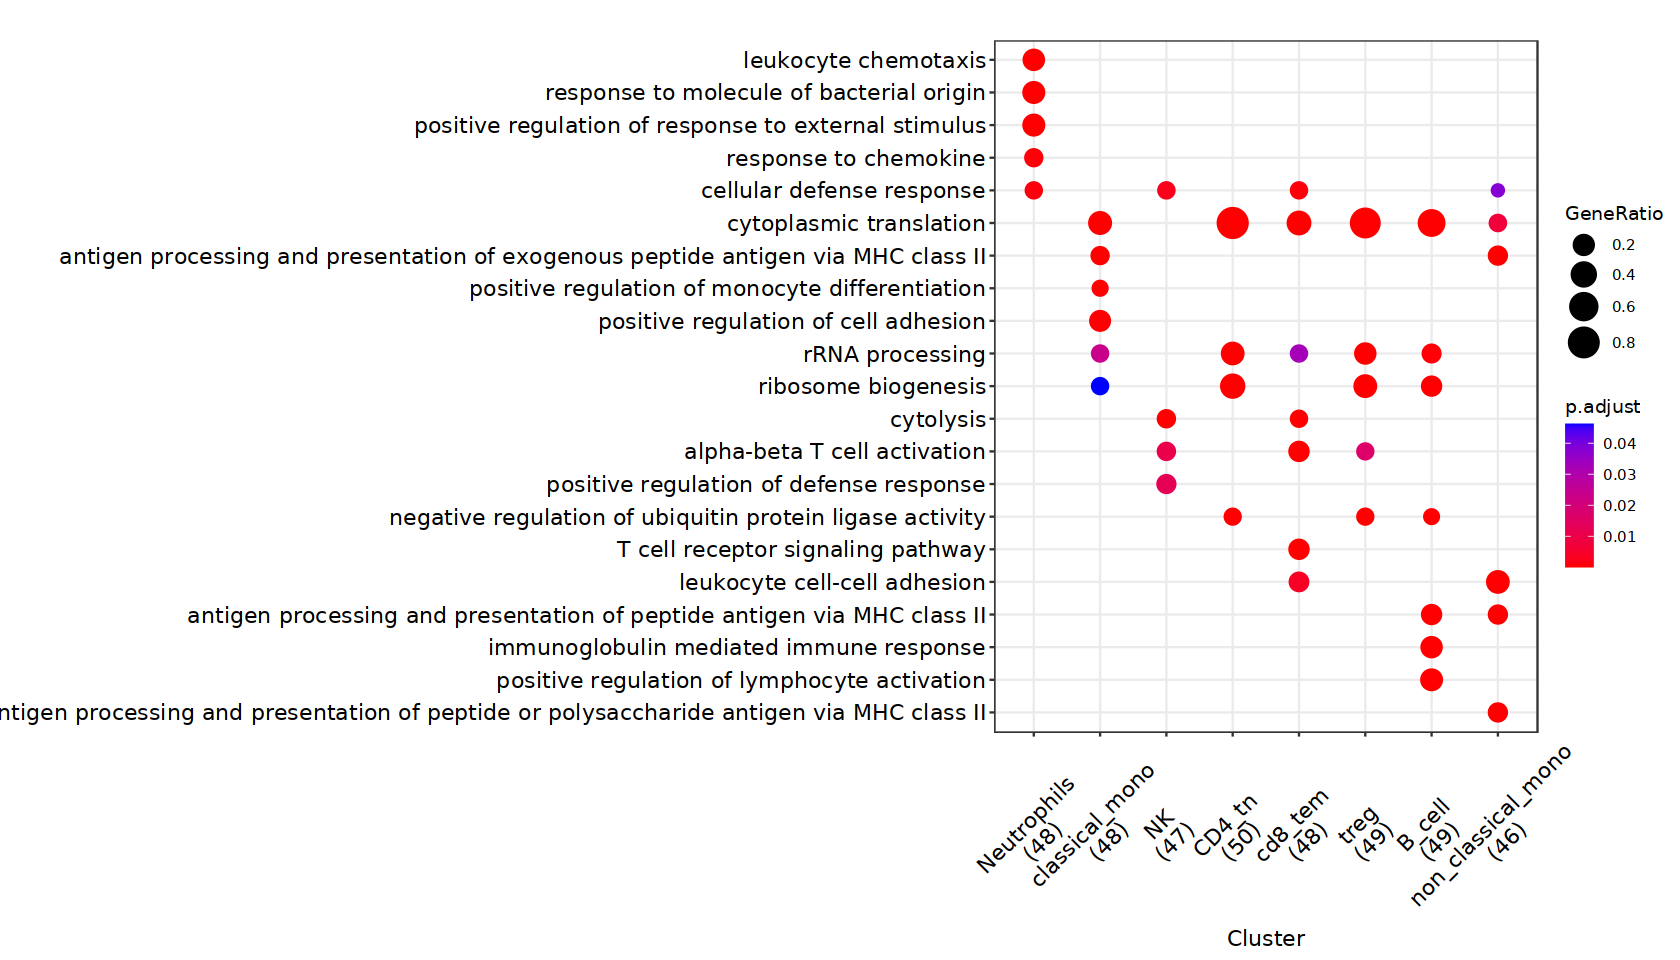

In [77]:
options(repr.plot.height = 8,repr.plot.width = 14)
enrichplot::dotplot(data_GO_sim, showCategory=4,font.size = 13,label_format = 100)+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [74]:
ggsave('figure8.pdf',height =  9,width = 8)

### 细胞数量差异

In [4]:
scRNA = readRDS('scRNA.xifen.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Warning message in eval(expr, envir = environment(.onLoad)):
"internal error -3 in R_decompress1"


In [5]:
table(scRNA$orig.ident)


CTR-1.matrix CTR-2.matrix CTR-3.matrix CTR-4.matrix CTR-5.matrix CTR-6.matrix 
        4032         2681         3431         5519         3191         2368 
 QG-1.matrix  QG-2.matrix  QG-3.matrix  QG-4.matrix  QG-5.matrix  QG-6.matrix 
        3784         4397         5005         4772         6713         3893 
 QG-7.matrix  QG-8.matrix 
        1133         4320 